In [3]:
# clean annotated data
def merge_tag(sent):
    '''
    Merge the tags that are split by the tokenizer

    Args:
        sent: a sentence with tags
    '''
    i = 0
    while i < len(sent["tags"]):
        if sent["tags"][i]["word"].startswith("##"):
            sent["tags"][i-1]["word"] += sent["tags"][i]["word"][2:]
            del sent["tags"][i]
        else:
            i += 1

# for book in annotated_books:
#     for sentence in book:
#         merge_tag(sentence)

for sentence in annotated_parents:
    merge_tag(sentence)

In [6]:
def bio_to_tags(sent):
    '''
    Convert BIO tag to tag

    Args:
        sent: a sentence json object
    '''
    pre_tag = None
    accumulative = 0
    i = 0
    while i < len(sent["tags"]):
        tag = sent["tags"][i]
        entity = tag["entity"]
        if entity.startswith("B-"):
            tag["entity"] = entity[2:]
            pre_tag = tag
            accumulative = 0
            i += 1
        elif entity.startswith("I-"):
            if pre_tag is None:
                sent["tags"].pop(i)
                accumulative = 0
            elif pre_tag["index"] == tag["index"] - 1 - accumulative:
                pre_tag["end"] = tag["end"]
                pre_tag["word"] = sent["sentence"][pre_tag["start"]:pre_tag["end"]].lower()
                sent["tags"].pop(i)
                accumulative += 1
            else:
                sent["tags"].pop(i)
                accumulative = 0
        else:
            # throw error
            print(tag)
            Exception("Invalid tag")

for sentence in annotated_parents:
        bio_to_tags(sentence)

In [4]:
# import the data for books

import json

with open('/Users/sunnyyu/Desktop/research/children_speech_books/code/python/generics/MERGED_DATA_BOOKS.json', 'r') as file:
    generics_data = json.load(file)

In [23]:
# examine all the generics in the book dataset

from collections import defaultdict

excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}


def process_and_print_generics_sentences(book_data):
    generics_sentences = defaultdict(list)  # Dictionary to store generics sentences per entity

    for book in book_data:
        for sentence_data in book:
            subjects = sentence_data.get('subjects', [])
            tags = sentence_data.get('tags', [])
            category = sentence_data.get('category')
            quantifier = sentence_data.get('quantified_classification')
            sentence_text = sentence_data.get('sentence', 'No sentence provided')
            
            #if category == 3:  # Check if the category is for generics
            if category == 3: # change to 4 for analyzing habituals
                for subject_info in subjects:
                    subject = subject_info['subject'].lower()
                    if subject not in excluded_pronouns:  # Ensure the subject is not a pronoun
                        for tag in tags:
                            if subject == tag['word'].lower():
                                entity = tag['entity']
                                if entity in tag_categories:
                                    generics_sentences[entity].append(sentence_text)

    # Print the generics sentences for each entity kind
    for entity, sentences in generics_sentences.items():
        print(f"Entity: {entity}")
        for sentence in sentences:
            print(f"  Sentence: {sentence}")

# Example usage:
process_and_print_generics_sentences(generics_data)

Entity: Social Kind/Role
  Sentence: A boxer might have trouble keeping his balance.
  Sentence: Most experts agreed that since Kim was so tired, he was more likely to suffer a deadly punch.
  Sentence: In an emergency, a diver cannot swim up to the surface because of the cave's ceiling.
  Sentence: One survivor describes it as being stuck inside a washing machine filled with rocks.
  Sentence: Usually, a driver climbs out of a fiery wreck.
  Sentence: A short time later a messenger arrived, announcing that the evil king had been overthrown.
  Sentence: One servant, Jun, had learned to read.
  Sentence: Early the next morning, a messenger arrived at the tent of the Lord of Weipu.
  Sentence: Once upon a time there were a king and a queen who lived happily together.
  Sentence: No!” A minister answered, saying, “Sire, when news came about your imprisonment, the queen disappeared.
  Sentence: No!” A minister answered, saying, “Sire, when news came about your imprisonment, the queen disap

In [6]:
import json
from collections import defaultdict

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category] += 1

# Process each book in the data
for book in generics_data:
    process_book(book)

# Convert defaultdict to dict for better readability
tag_categories = {k: dict(v) for k, v in tag_categories.items()}

# Calculate the total count for each tag category
total_counts = {entity: sum(categories.values()) for entity, categories in tag_categories.items()}

# Calculate proportions
tag_proportions = {
    entity: {category: count / total_counts[entity] for category, count in categories.items()}
    for entity, categories in tag_categories.items()
}

# Print the counts and proportions
for entity, categories in tag_categories.items():
    print(f"Entity: {entity}")
    for category, count in categories.items():
        proportion = tag_proportions[entity][category]
        print(f"  Category {category}: Count = {count}, Proportion = {proportion:.2%}")

Entity: Non-Living Kind
  Category 1: Count = 886, Proportion = 33.43%
  Category 0: Count = 1147, Proportion = 43.28%
  Category 8: Count = 191, Proportion = 7.21%
  Category 3: Count = 48, Proportion = 1.81%
  Category 4: Count = 146, Proportion = 5.51%
  Category 2: Count = 104, Proportion = 3.92%
  Category 5: Count = 77, Proportion = 2.91%
  Category 6: Count = 26, Proportion = 0.98%
  Category 7: Count = 25, Proportion = 0.94%
Entity: Social Kind/Role
  Category 0: Count = 2392, Proportion = 38.89%
  Category 1: Count = 2089, Proportion = 33.97%
  Category 3: Count = 83, Proportion = 1.35%
  Category 5: Count = 196, Proportion = 3.19%
  Category 8: Count = 144, Proportion = 2.34%
  Category 4: Count = 285, Proportion = 4.63%
  Category 2: Count = 881, Proportion = 14.33%
  Category 6: Count = 66, Proportion = 1.07%
  Category 7: Count = 14, Proportion = 0.23%
Entity: Biological Kind
  Category 0: Count = 6388, Proportion = 36.46%
  Category 2: Count = 2693, Proportion = 15.37%
  

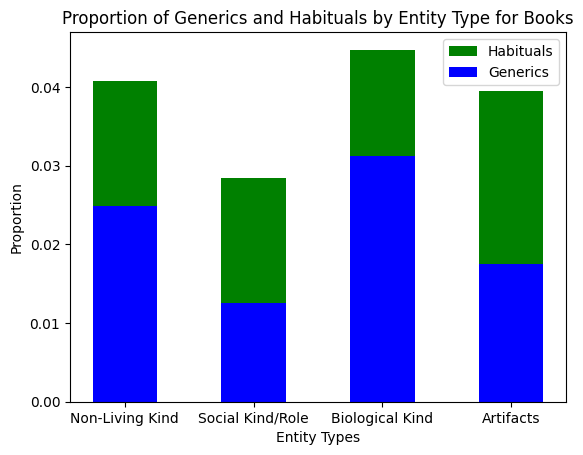

In [5]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        quantifier = sentence_data.get('quantified_classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in tag_categories:
                            tag_categories[entity][category] += 1 # change category to quantifier for analyzing quantifiers

# Process each book in the data
for book in generics_data:
    process_book(book)

# Convert defaultdict to dict for better readability
tag_categories = {k: dict(v) for k, v in tag_categories.items()}

# Calculate the total count for each tag category
total_counts = {entity: sum(categories.values()) for entity, categories in tag_categories.items()}

# Calculate proportions
tag_proportions = {
    entity: {category: count / total_counts[entity] for category, count in categories.items()}
    for entity, categories in tag_categories.items()
}

# Extract proportions for category 3 (Generics) and category 4 (Generalizing)
generics_proportions = {entity: proportions.get(3, 0) for entity, proportions in tag_proportions.items()}
generalizing_proportions = {entity: proportions.get(4, 0) for entity, proportions in tag_proportions.items()}
#generics_proportions = {entity: proportions.get("Universal Quantifier", 0) + proportions.get("Existential Quantifier", 0) for entity, proportions in tag_proportions.items()}
#generalizing_proportions = {entity: proportions.get("Neither", 0) for entity, proportions in tag_proportions.items()}

# Plotting
fig, ax = plt.subplots()
entities = list(generics_proportions.keys())
x = range(len(entities))  # the label locations
width = 0.5  # the width of the bars

rects1 = ax.bar(x, [generics_proportions[entity] for entity in entities], width, label='Generics', color='blue')
rects2 = ax.bar(x, [generalizing_proportions[entity] for entity in entities], width, bottom=[generics_proportions[entity] for entity in entities], label='Habituals', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Entity Types')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Generics and Habituals by Entity Type for Books')
ax.set_xticks(x)
ax.set_xticklabels(entities)

# Reverse the order of the legend entries
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

plt.show()


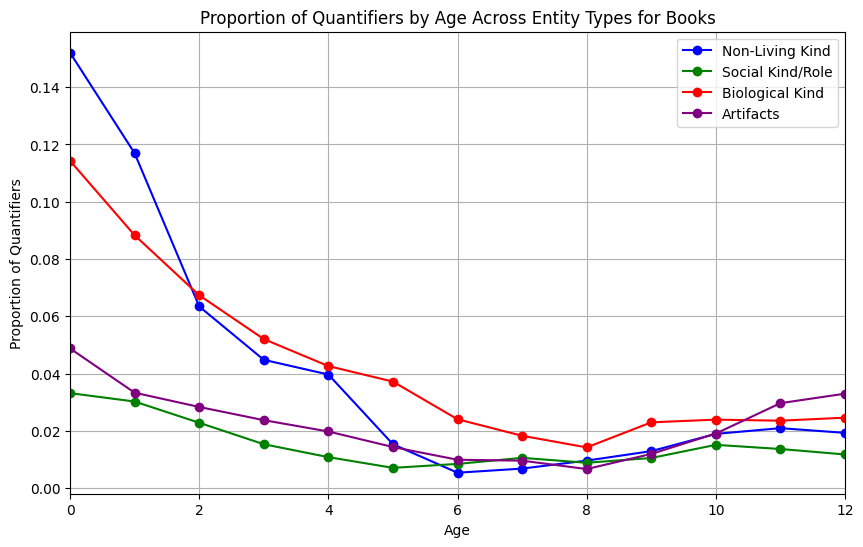

In [7]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(Counter),
    'Social Kind/Role': defaultdict(Counter),
    'Biological Kind': defaultdict(Counter),
    'Artifacts': defaultdict(Counter)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        quantifier = sentence_data.get('quantified_classification')
        age_min = int(sentence_data.get('age_min', 0))
        age_max = int(sentence_data.get('age_max', 0))
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories:
                                tag_categories[entity][age][category] += 1

# Process each book in the data
for book in generics_data:
    process_book(book)

# Calculate the proportion of category 3 across ages for each entity
age_proportions = defaultdict(dict)
for entity, age_data in tag_categories.items():
    for age, categories in age_data.items():
        total = sum(categories.values())
        if total > 0 and 3 in categories:
            age_proportions[entity][age] = categories[3] / total
            #universal = categories.get("Universal Quantifier", 0)
            #existential = categories.get("Existential Quantifier", 0)
            #age_proportions[entity][age] = (universal + existential) / total

# Plotting the results in one plot with different colors
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors for the lines
for (entity, age_data), color in zip(age_proportions.items(), colors):
    ages = sorted(age_data.keys())
    proportions = [age_data[age] for age in ages]
    plt.plot(ages, proportions, marker='o', linestyle='-', label=entity, color=color)

plt.title('Proportion of Quantifiers by Age Across Entity Types for Books')
plt.xlabel('Age')
plt.ylabel('Proportion of Quantifiers')
plt.grid(True)
plt.xlim(0, 12)
plt.legend()  # Add a legend to identify the lines
plt.show()

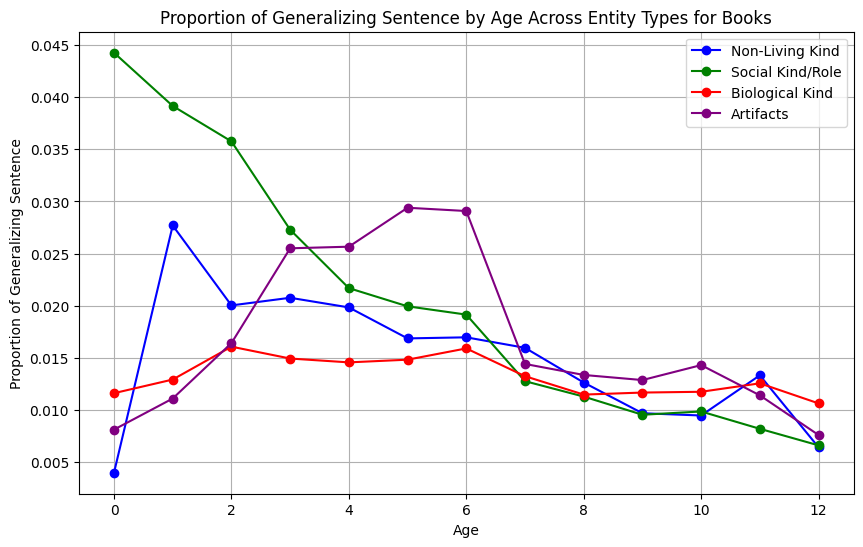

In [15]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# Initialize the dictionary to store counts
tag_categories = {
    'Non-Living Kind': defaultdict(Counter),
    'Social Kind/Role': defaultdict(Counter),
    'Biological Kind': defaultdict(Counter),
    'Artifacts': defaultdict(Counter)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        age_min = int(sentence_data.get('age_min', 0))
        age_max = int(sentence_data.get('age_max', 0))
        
        for age in range(age_min, age_max + 1):
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                    for tag in tags:
                        if subject == tag['word'].lower():
                            entity = tag['entity']
                            if entity in tag_categories:
                                tag_categories[entity][age][category] += 1

# Process each book in the data
for book in generics_data:
    process_book(book)

# Calculate the proportion of category 4 across ages for each entity
age_proportions = defaultdict(dict)
for entity, age_data in tag_categories.items():
    for age, categories in age_data.items():
        total = sum(categories.values())
        if total > 0 and 4 in categories:
            age_proportions[entity][age] = categories[4] / total

# Plotting the results in one plot with different colors
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors for the lines
for (entity, age_data), color in zip(age_proportions.items(), colors):
    ages = sorted(age_data.keys())
    proportions = [age_data[age] for age in ages]
    plt.plot(ages, proportions, marker='o', linestyle='-', label=entity, color=color)

plt.title('Proportion of Generalizing Sentence by Age Across Entity Types for Books')
plt.xlabel('Age')
plt.ylabel('Proportion of Generalizing Sentence')
plt.grid(True)
plt.legend()  # Add a legend to identify the lines
plt.show()

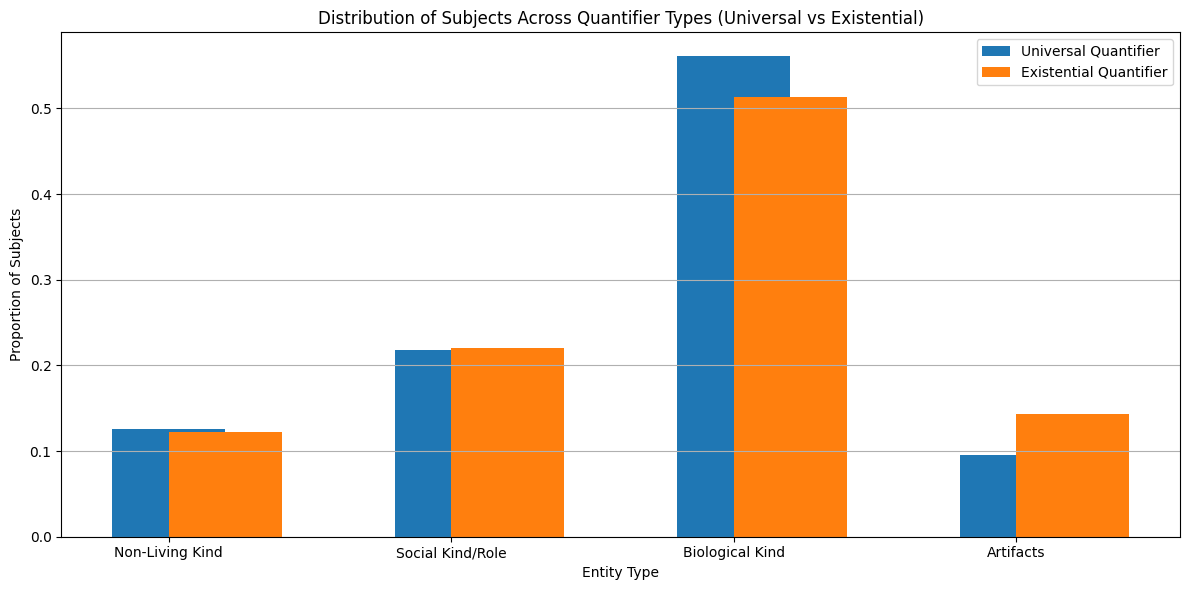

Generic Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 61, Proportion = 12.58%
Entity: Social Kind/Role
  Total Count = 106, Proportion = 21.86%
Entity: Biological Kind
  Total Count = 272, Proportion = 56.08%
Entity: Artifacts
  Total Count = 46, Proportion = 9.48%

Non-Generic Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 133, Proportion = 12.24%
Entity: Social Kind/Role
  Total Count = 240, Proportion = 22.08%
Entity: Biological Kind
  Total Count = 558, Proportion = 51.33%
Entity: Artifacts
  Total Count = 156, Proportion = 14.35%


In [20]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize dictionaries to store counts for generics and non-generics
generic_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

non_generic_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        quantifier = sentence_data.get("quantified_classification")
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in generic_counts:
                            if quantifier == "Universal Quantifier":
                                generic_counts[entity][category] += 1
                            elif quantifier == "Existential Quantifier":
                                non_generic_counts[entity][category] += 1

# Process each book in the data
for book in generics_data:
    process_book(book)

# Calculate total counts and proportions for generics and non-generics
total_generic_counts = {entity: sum(categories.values()) for entity, categories in generic_counts.items()}
total_non_generic_counts = {entity: sum(categories.values()) for entity, categories in non_generic_counts.items()}

generic_proportions = {
    entity: (total_generic_counts[entity] / sum(total_generic_counts.values())) if sum(total_generic_counts.values()) > 0 else 0
    for entity in generic_counts
}

non_generic_proportions = {
    entity: (total_non_generic_counts[entity] / sum(total_non_generic_counts.values())) if sum(total_non_generic_counts.values()) > 0 else 0
    for entity in non_generic_counts
}

# Plot the proportions for generics and non-generics
entity_types = list(generic_counts.keys())
x = range(len(entity_types))

plt.figure(figsize=(12, 6))

# Plot generics
plt.bar(x, [generic_proportions[entity] for entity in entity_types], width=0.4, label='Universal Quantifier', align='center')

# Plot non-generics
plt.bar(x, [non_generic_proportions[entity] for entity in entity_types], width=0.4, label='Existential Quantifier', align='edge')

plt.xticks(x, entity_types)
plt.title('Distribution of Subjects Across Quantifier Types (Universal vs Existential)')
plt.xlabel('Entity Type')
plt.ylabel('Proportion of Subjects')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print the counts and proportions for each entity type
print("Generic Counts and Proportions:")
for entity, categories in generic_counts.items():
    print(f"Entity: {entity}")
    count = total_generic_counts[entity]
    proportion = generic_proportions[entity]
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")

print("\nNon-Generic Counts and Proportions:")
for entity, categories in non_generic_counts.items():
    print(f"Entity: {entity}")
    count = total_non_generic_counts[entity]
    proportion = non_generic_proportions[entity]
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")

In [ ]:
# change over age

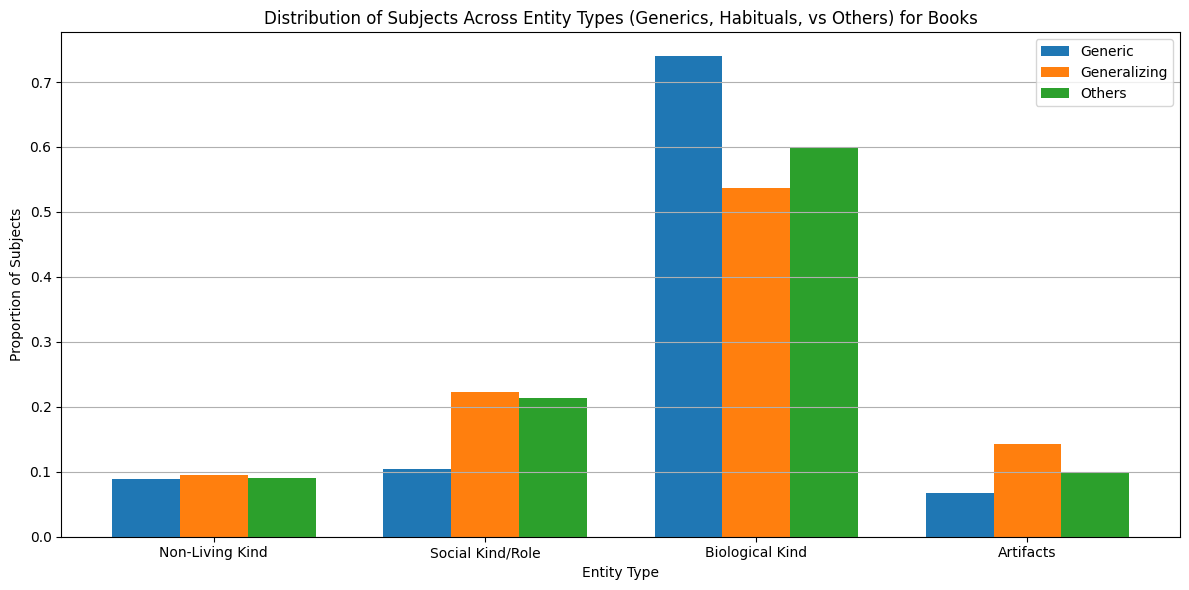

Generic Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 66, Proportion = 8.91%
Entity: Social Kind/Role
  Total Count = 77, Proportion = 10.39%
Entity: Biological Kind
  Total Count = 548, Proportion = 73.95%
Entity: Artifacts
  Total Count = 50, Proportion = 6.75%

Generalizing Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 42, Proportion = 9.57%
Entity: Social Kind/Role
  Total Count = 98, Proportion = 22.32%
Entity: Biological Kind
  Total Count = 236, Proportion = 53.76%
Entity: Artifacts
  Total Count = 63, Proportion = 14.35%

Non-Generic Counts and Proportions:
Entity: Non-Living Kind
  Total Count = 2542, Proportion = 9.08%
Entity: Social Kind/Role
  Total Count = 5975, Proportion = 21.34%
Entity: Biological Kind
  Total Count = 16738, Proportion = 59.77%
Entity: Artifacts
  Total Count = 2748, Proportion = 9.81%


In [12]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize dictionaries to store counts for generics, generalizing, and non-generics
generic_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

generalizing_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

non_generic_counts = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude from "Biological Kind"
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        subjects = sentence_data.get('subjects', [])
        tags = sentence_data.get('tags', [])
        category = sentence_data.get('category')
        quantifier = sentence_data.get('quantified_classification')
        
        for subject_info in subjects:
            subject = subject_info['subject'].lower()
            if subject not in excluded_pronouns:  # Check if the subject is not a pronoun
                for tag in tags:
                    if subject == tag['word'].lower():
                        entity = tag['entity']
                        if entity in generic_counts:
                            if category == 3:
                                generic_counts[entity][category] += 1
                            elif category == 4:
                                generalizing_counts[entity][category] += 1
                            else:
                                non_generic_counts[entity][category] += 1


# Process each book in the data
for book in generics_data:
    process_book(book)

# Calculate total counts and proportions for generics, generalizing, and non-generics
total_generic_counts = {entity: sum(categories.values()) for entity, categories in generic_counts.items()}
total_generalizing_counts = {entity: sum(categories.values()) for entity, categories in generalizing_counts.items()}
total_non_generic_counts = {entity: sum(categories.values()) for entity, categories in non_generic_counts.items()}

generic_proportions = {
    entity: (total_generic_counts[entity] / sum(total_generic_counts.values())) if sum(total_generic_counts.values()) > 0 else 0
    for entity in generic_counts
}

generalizing_proportions = {
    entity: (total_generalizing_counts[entity] / sum(total_generalizing_counts.values())) if sum(total_generalizing_counts.values()) > 0 else 0
    for entity in generalizing_counts
}

non_generic_proportions = {
    entity: (total_non_generic_counts[entity] / sum(total_non_generic_counts.values())) if sum(total_non_generic_counts.values()) > 0 else 0
    for entity in non_generic_counts
}

# Plot the proportions for generics, generalizing, and non-generics
entity_types = list(generic_counts.keys())
x = range(len(entity_types))
width = 0.25  # Bar width

plt.figure(figsize=(12, 6))

# Plot generics
plt.bar([i - width for i in x], [generic_proportions[entity] for entity in entity_types], width=width, label='Generic', align='center')

# Plot generalizing
plt.bar(x, [generalizing_proportions[entity] for entity in entity_types], width=width, label='Generalizing', align='center')

# Plot non-generics
plt.bar([i + width for i in x], [non_generic_proportions[entity] for entity in entity_types], width=width, label='Others', align='center')

plt.xticks(x, entity_types)
plt.title('Distribution of Subjects Across Entity Types (Generics, Habituals, vs Others) for Books')
plt.xlabel('Entity Type')
plt.ylabel('Proportion of Subjects')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print the counts and proportions for each entity type
print("Generic Counts and Proportions:")
for entity, categories in generic_counts.items():
    count = total_generic_counts[entity]
    proportion = generic_proportions[entity]
    print(f"Entity: {entity}")
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")

print("\nGeneralizing Counts and Proportions:")
for entity, categories in generalizing_counts.items():
    count = total_generalizing_counts[entity]
    proportion = generalizing_proportions[entity]
    print(f"Entity: {entity}")
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")

print("\nNon-Generic Counts and Proportions:")
for entity, categories in non_generic_counts.items():
    count = total_non_generic_counts[entity]
    proportion = non_generic_proportions[entity]
    print(f"Entity: {entity}")
    print(f"  Total Count = {count}, Proportion = {proportion:.2%}")


In [29]:
import json
from collections import defaultdict

# Initialize the dictionary to store feature distribution
feature_distribution = {
    'Non-Living Kind': defaultdict(int),
    'Social Kind/Role': defaultdict(int),
    'Biological Kind': defaultdict(int),
    'Artifacts': defaultdict(int)
}

# Set of pronouns to exclude
excluded_pronouns = {'he', 'you', 'we', 'she', 'i', 'they', 'him', 'her', 'them', 'his', 'hers', 'theirs', 'it'}

# Function to process each book's sentences
def process_book(book):
    for sentence_data in book:
        category = sentence_data.get('category')
        if category == 4:
            subjects = sentence_data.get('subjects', [])
            tags = sentence_data.get('tags', [])
            
            for subject_info in subjects:
                subject = subject_info['subject'].lower()
                
                if subject not in excluded_pronouns:  # Exclude pronouns
                    for tag in tags:
                        if subject == tag['word'].lower():
                            subject_entity = tag['entity']
                            
                            if subject_entity in feature_distribution:
                                words_pointing_to_subject = subject_info['words_pointing_to_subject']
                                
                                for word in words_pointing_to_subject:
                                    # Find the corresponding label for the word
                                    for tag in tags:
                                        if word.lower() == tag['word'].lower():
                                            feature = tag['entity']
                                            if feature in ['Perceptual', 'Behavioral', 'Mental State']:
                                                feature_distribution[subject_entity][feature] += 1

# Process each book in the data
for book in generics_data:
    process_book(book)

# Convert defaultdict to dict for better readability
feature_distribution = {k: dict(v) for k, v in feature_distribution.items()}

# Calculate total counts and proportions
total_counts = {entity: sum(features.values()) for entity, features in feature_distribution.items()}
feature_proportions = {
    entity: {feature: count / total_counts[entity] if total_counts[entity] > 0 else 0 for feature, count in features.items()}
    for entity, features in feature_distribution.items()
}

# Print the results with proportions
for entity, features in feature_distribution.items():
    print(f"Entity: {entity}")
    for feature, count in features.items():
        proportion = feature_proportions[entity][feature]
        print(f"  Feature {feature}: Count = {count}, Proportion = {proportion:.2%}")


Entity: Non-Living Kind
  Feature Behavioral: Count = 250, Proportion = 93.28%
  Feature Mental State: Count = 7, Proportion = 2.61%
  Feature Perceptual: Count = 11, Proportion = 4.10%
Entity: Social Kind/Role
  Feature Behavioral: Count = 412, Proportion = 92.17%
  Feature Mental State: Count = 34, Proportion = 7.61%
  Feature Perceptual: Count = 1, Proportion = 0.22%
Entity: Biological Kind
  Feature Behavioral: Count = 1095, Proportion = 86.15%
  Feature Mental State: Count = 160, Proportion = 12.59%
  Feature Perceptual: Count = 16, Proportion = 1.26%
Entity: Artifacts
  Feature Behavioral: Count = 323, Proportion = 95.00%
  Feature Perceptual: Count = 7, Proportion = 2.06%
  Feature Mental State: Count = 10, Proportion = 2.94%
